In [148]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

# Introducing Bayesian statistics through a betting game

## The game
 - Throwing a coin and betting on the outcome being a Heads or a Tails
 - If the outcome is Heads you win £1 otherwise you win £0
 - Under what conditions would you play this game?

In [26]:
def throw(p=True):
    if np.random.rand() > 0.5:
        if p:
            print('Heads')
        return 1.0
    else:
        if p:
            print('Tails')
        return 0.0

In [27]:
_ = throw()

Tails


In [28]:
results = np.array([throw(p=False) for _ in range(100)])
print(np.mean(results))

0.53


## Would you play:
 - If it costs £0.05 to play?


In [75]:
def game(Games, cost_to_play, p=True):
    yes='Yes'
    no='No'

    total_cost = Games * cost_to_play
    if p:
        print(f'Amount it costs you : £{total_cost}')

    winnings = np.sum(np.array([throw(p=False) for _ in range(Games)]))
    if p:
        print(f'Amount you win : £{winnings}')

    if p:
        print(f'Was it wise to play {yes if winnings>total_cost else no}')
    return 1 if winnings>total_cost else 0

In [78]:
Games = 100
cost_to_play = 0.05

_ = game(Games, cost_to_play)

Amount it costs you : £5.0
Amount you win : £51.0
Was it wise to play Yes


 - If it costs £0.95 to play?

In [44]:
Games = 100
cost_to_play = 0.95

_ = game(Games, cost_to_play)

Amount it costs you : £95.0
Amount you win : £49.0
Was it wise to play No


## You now own the game
### What would you set the sell and buy prices at if I choose whether I want to buy or sell?
 - If I choose to sell you pay £p to buy and I give you £1 if the outcome is heads
 - If I choose to buy I pay £p to sell and you give me £1 if the outcome is heads

### If you have a belief p in the outcome:
 - you would be willing to buy at $\le$ £p
 - and you would be willing to sell at $\ge$ £p
 
### This captured our degree of uncertainty about the event taking place (aka $\textbf{uncertainty}$)

# Rational Beliefs
## New game with two coins
 - Betting on the outcome of coin 1 being Heads
 - Betting on the outcome of coin 2 being Tails
 
 - You set the price for coin 1 at £q and for coin 2 at £p
 - I decide whether to buy or sell


In [69]:
throws = 100
p = 0.4
q = 0.4


In [70]:
will_i_buy = True if (p+q)<1 else False

if will_i_buy:
    print(f'Will I buy off you {will_i_buy}')
    results1 = np.array([throw(p=False) for _ in range(throws)])
    results2 = 1-np.array([throw(p=False) for _ in range(throws)])
    
    total_cost = throws*(p+q)
    print(f'Amount it costs me : £{total_cost}')
    
    winnings = np.sum(results1) + np.sum(results2)
    print(f'Amount I win : £{winnings}')
    
else:
    print(f'Will I buy off you {will_i_buy}')


Will I buy off you True
Amount it costs me : £80.0
Amount I win : £98.0


### Outcome
 - If £q + £p is less than £1 then I will always play as there is 50% chance of winning each game
 - If I play enough times I will win £1 on average from each game, but it costs less than £1 to play
 - This is called a Dutch book, you are guarenteed to lose money.

### Set of beliefs is called rational is no Dutch book exists

## More formally - Rational beliefs
 - Define a sample space $\textbf{X}$ of events
  - E.g. flipping two coins $\textbf{X = {HH, HT, TH, TT}}$
 - Let $\textbf{A}$ be an event (a subspace of $\textbf{X}$)
  - If $\textbf{A}$ holds true at least one outcome occured
  - E.g. "At least on head occured" $\leftrightarrow$ $\textbf{A = {HH, HT, TH}}$
 - Write $P_A$ for belief of an event
  - Your wager on $\textbf{A}$ (assuming all wagers are unit wagers)

#### Sum of probabilities equals 1
 - Can show that $\{P_A\}_{A \subset X}$ are rational beliefs iff $\{P_A\}_{A \subset X}$ satisfy laws of probability theory

### We have just shown that $p_{A} + p_{A^{c}} = 1$



### In addition, I claim that:
 - $0 \leq p_X \leq 1$
 - $p_X = 1$
 - $P_{A \cup B}$ = $P_A$ + $P_B$

#### Back to the game
 - $p_A > 1$
 - I sell the bet on a coin flip where you win £1 if the outcome is Heads at $>$ 1

In [71]:
Games = 100
cost_to_play = 1.1

_ = game(Games, cost_to_play)

Amount it costs you : £110.00000000000001
Amount you win : £47.0
Was it wise to play No


#### Back to the game
 - $p_a < 0$
 - I buy the bet on a coin flip where you win £1 if the outcome is Heads at $<$ 0
 - ...
 - Given the cost is less than £0, you will pay me to play so I am winning even when the coin flip doesn't go my way!

#### Back to the game
 - $p_X > 1$
 - Your belief that at least one outcome in X holds true
 - ...
 - Same as $P_A > 1$ if you belive that at least one outcome holding true is worth $>$ than £1 in a game where the payout is £1 I will sell to you

#### Back to the game
 - $p_X = 1$
 - Your belief that at least one outcome in X holds true
 - ...
 - Same as $P_A < 1$ if you belive that at least one outcome holding true is worth $<$ that £1 in a game where the payout is £1 I will sell to you
 - At least one outcome must hold. You will lose £1-p

#### Back to the game
 - $P_{A \cup B}$ = $P_A$ + $P_B$
 - $P_A$ your price to pay if event A happens
 - $P_B$ your price to pay if event B happens
 - $P_{A \cup B}$ your price to pay if event A or B happens
 - ...
 - if $P_{A \cup B}$ < $P_A$ + $P_B$
  - I will sell you A and B and buy A$\cup$B (two disjoint events) from you

In [84]:
Pa = 0.5
Pb = 0.5
Paub = 0.8

if Paub < Pa+Pb:
    cost_to_you = Pa + Pb
    cost_to_me = Paub
    print(f'Amount you owe me : £{cost_to_you-cost_to_me}')
else:
    print(f'I will not play')



Amount you owe me : £0.19999999999999996


## All laws of propability follow from these three properties of rational beliefs
### $0 \leq p_A \leq 1$ $\>\>\>\>\>\>$ $\forall A \subset X$
### $p_X = 1$
### $P_{A \cup B}$ = $P_A$ + $P_B$

### This is known as the Bayesian interpretation of probability theory

![title](https://imgs.xkcd.com/comics/frequentists_vs_bayesians.png)

# Bayes Rule

 - To make probability statements about $\theta$ given $data$ we start with a model providing a joint probability distribution for $\theta$ and $data$, $p(\theta, data)$.
 - This can be rewritten : $p(\theta, data) = p(data \mid \theta) p(\theta)$ 
 
## $p(\theta \mid data) = \dfrac{p(data \mid \theta) p(\theta)}{p(data)}$
 - Posterior : $p(\theta \mid data)$
 - Likelihood : $p(data \mid \theta)$
 - Prior : $p(\theta)$
 - Model Evidence : $p(data)$
 


### Example likelihood model is a coin flip
 - A fair coin gives $\theta = 0.5$
 - ...
 - So what is the probability of generating a particular sample given the model parameters
 - $Pr(H,H \mid \theta = 0.5) = Pr(H \mid \theta = 0.5)Pr(H \mid \theta = 0.5) = 0.5 * 0.5 = 0.25$

### Example prior over parameters for the coin
 - We may not know that the coin is fair
 - We could define a prior assigning the same prior belief across all possible parameter values, or
 - We could define a prior belief more confident the coin is fair

Text(0.5, 1.0, 'Prior beliefs about the coin')

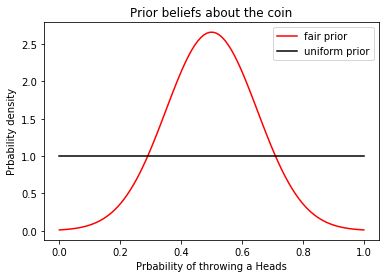

In [104]:
x = np.linspace(0, 1, 100)
fair_prior = stats.norm.pdf(x, 0.5, 0.15)
uniform = np.ones(100)
fig, ax = plt.subplots()
ax.plot(x, fair_prior, 'r', label='fair prior')
ax.plot(x, uniform, 'k', label='uniform prior')
ax.legend()
ax.set_xlabel('Prbability of throwing a Heads')
ax.set_ylabel('Prbability density')
ax.set_title('Prior beliefs about the coin')

### The evidence 
 - $p(data) = \int p(data \mid \theta) p(\theta) d \theta$

### The posterior 
 - $p(\theta \mid data)$
 - May want to know the posterior using a uniform prior given before and knowing a coin was flipped 10 times giving 7 heads, or
 - The coin was flipped 100 times giving 70 heads

#### For a coin throwing example the likelihood is calculated using the following equation
 - $p(data \mid \theta) = \prod _{i} p(y_i \mid \theta) = \theta^{\#heads} (1-\theta)^{\#tails}$

### The unnormalized posterior is often used as the model evidence can be difficult to calculate, this is calculated as $p(data \mid \theta) p(\theta)$

#### Unnormlaized posterior calculation

In [169]:
def calc_posterior(theta, num_heads, num_throws, prior, normalize = True):
    ## Likelihood calculation
    likelihood = np.power(theta,num_heads) * np.power((1-theta),(num_throws-num_heads))
    if normalize:
        ## Normalizing
        normalizing = (math.factorial(num_heads) * math.factorial(num_throws-num_heads)) / math.factorial(num_throws+1)
        ## Posterior density calculation
        posterior = likelihood * prior / normalizing
    else:
        posterior = likelihood * prior
    return posterior

In [170]:
## Prior calculation
prior = np.ones(100) #Uniform

In [179]:
## Data
x = np.linspace(0, 1, 100)
num_heads = 7
num_throws = 10

## Get posterios
posterior7 = calc_posterior(theta=x, num_heads=num_heads, num_throws=num_throws, prior=prior, normalize=False)

In [180]:
## Data
x = np.linspace(0, 1, 100)
num_heads = 70
num_throws = 100

posterior70 = calc_posterior(theta=x, num_heads=num_heads, num_throws=num_throws, prior=prior, normalize=False)

Text(0, 0.5, 'Unnormalized Posterior densityy')

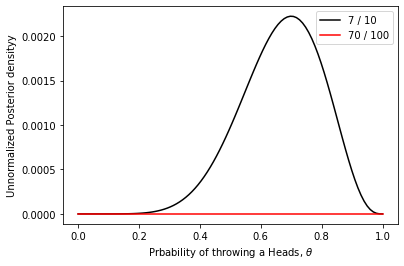

In [181]:
fig, ax = plt.subplots()
ax.plot(x, posterior7, 'k', label='7 / 10')
ax.plot(x, posterior70, 'r', label='70 / 100')
ax.legend()
ax.set_xlabel(r'Prbability of throwing a Heads, $\theta$')
ax.set_ylabel(r'Unnormalized Posterior densityy')
# ax.set_title('Posterior density')

#### Normlaized posterior calculation 
 - The model choice made allows for the normalizing constant (the model evidence) to be calculated

In [174]:
## Prior calculation
prior = np.ones(100) #Uniform

In [175]:
## Data
x = np.linspace(0, 1, 100)
num_heads = 7
num_throws = 10

## Get posterios
posterior7 = calc_posterior(theta=x, num_heads=num_heads, num_throws=num_throws, prior=prior, normalize=True)

In [176]:
## Data
x = np.linspace(0, 1, 100)
num_heads = 70
num_throws = 100

posterior70 = calc_posterior(theta=x, num_heads=num_heads, num_throws=num_throws, prior=prior, normalize=True)

Text(0, 0.5, 'Posterior densityy')

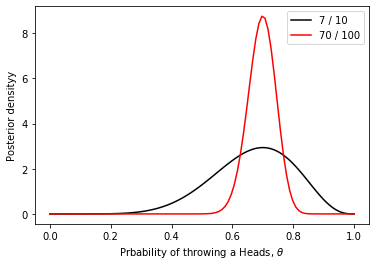

In [177]:
fig, ax = plt.subplots()
ax.plot(x, posterior7, 'k', label='7 / 10')
ax.plot(x, posterior70, 'r', label='70 / 100')
ax.legend()
ax.set_xlabel(r'Prbability of throwing a Heads, $\theta$')
ax.set_ylabel(r'Posterior densityy')
# ax.set_title('Posterior density')